<h1><center>DATA PRE-PROCESSING </center></h1>




In [1]:
import nltk

<h3>1.Importing the kaggle file</h3>





<h3> 2.Importing the packages :</h3>

In [2]:
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
import matplotlib.pyplot as plt



pd.options.mode.chained_assignment = None

<h3>3.Creating the intial DataFrame</h3>

In [3]:
full_df = pd.read_csv("My_Personality.csv",encoding = "ISO-8859-1")
full_df.head()

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/19/09 03:21 PM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1
1,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she ca...,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/02/09 08:41 AM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1
2,b7b7764cfa1c523e4e93ab2a79a946c4,is sore and wants the knot of muscles at the b...,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/15/09 01:15 PM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1
3,b7b7764cfa1c523e4e93ab2a79a946c4,likes how the day sounds in this new song.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/22/09 04:48 AM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1
4,b7b7764cfa1c523e4e93ab2a79a946c4,is home. <3,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/20/09 02:31 AM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1


<h3>3.1. EXTRACTING STATUS ATTRIBUTE FOR PRE-PROCESSING. </h3>


In [4]:
df = full_df[["STATUS"]]
df

,STATUS
0,likes the sound of thunder.
1,is so sleepy it's not even funny that's she ca...
2,is sore and wants the knot of muscles at the b...
3,likes how the day sounds in this new song.
4,is home. <3
...,...
9912,little things give you away.
9913,is wishing it was Saturday.
9914,is studying hard for the G.R.E.
9915,snipers get more head


<h1>4. TEXT PRE-PROCESSING</h1>

<h3>4.1. Converting into lower case

In [5]:
#attribute name ====> "text_lower"
df["text_lower"] = df["STATUS"].str.lower()
df.head()

,STATUS,text_lower
0,likes the sound of thunder.,likes the sound of thunder.
1,is so sleepy it's not even funny that's she ca...,is so sleepy it's not even funny that's she ca...
2,is sore and wants the knot of muscles at the b...,is sore and wants the knot of muscles at the b...
3,likes how the day sounds in this new song.,likes how the day sounds in this new song.
4,is home. <3,is home. <3


<h3>4.2.  Removing Stop words

In [6]:
#downloading the nltk stopword package.
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
#importing package
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))

def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["text_wo_stop"] = df["text_lower"].apply(lambda text: remove_stopwords(text))
df.head()

,STATUS,text_lower,text_wo_stop
0,likes the sound of thunder.,likes the sound of thunder.,likes sound thunder.
1,is so sleepy it's not even funny that's she ca...,is so sleepy it's not even funny that's she ca...,sleepy even funny that's can't get sleep.
2,is sore and wants the knot of muscles at the b...,is sore and wants the knot of muscles at the b...,sore wants knot muscles base neck stop hurting...
3,likes how the day sounds in this new song.,likes how the day sounds in this new song.,likes day sounds new song.
4,is home. <3,is home. <3,home. <3


<h3>4.3. Finding the most frequent words

In [8]:
from collections import Counter
cnt = Counter()
for text in df["text_wo_stop"].values:
    for word in text.split():
        cnt[word] += 1

arry_freak = cnt.most_common(50)

<h3>4.3.1. Word cloud

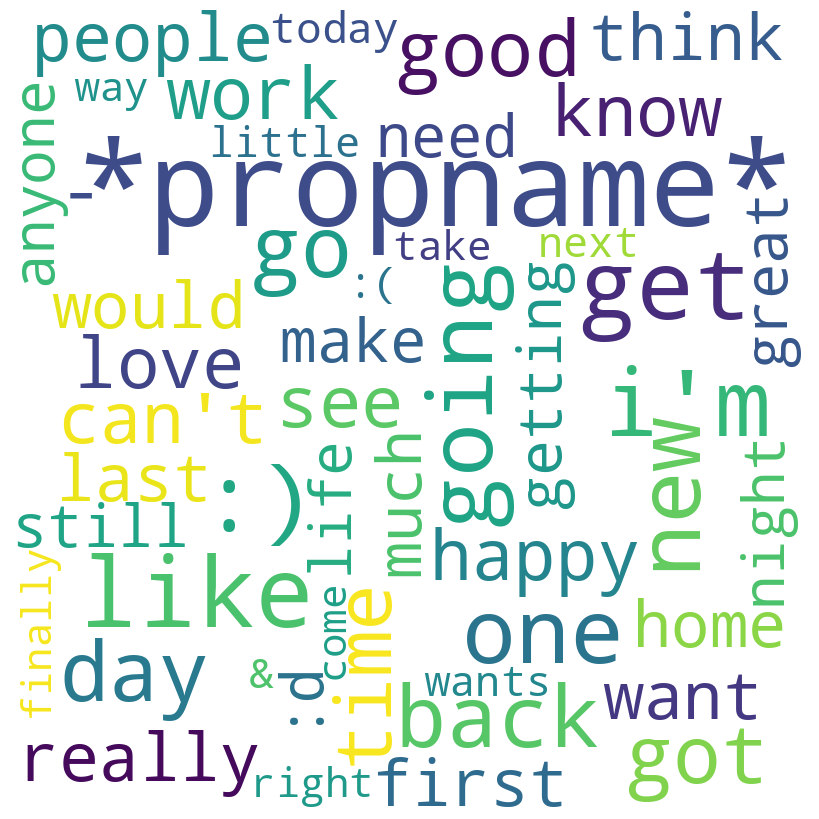

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# data
data = {'*propname*': 712, 'like': 465, 'get': 454, ':)': 428, "i'm": 423, 'one': 397, 'going': 396, 'new': 375, 'go': 352, 'back': 348, 'day': 329, 'got': 307, 'time': 295, 'good': 284, 'work': 248, 'love': 244, 'see': 243, 'know': 243, 'happy': 236, "can't": 235, 'really': 217, '-': 214, 'people': 211, 'want': 204, 'first': 199, 'last': 196, 'think': 195, 'would': 192, 'home': 191, 'much': 181, 'make': 178, 'getting': 175, 'still': 170, 'need': 170, 'great': 168, ':d': 168, 'anyone': 162, 'life': 160, 'night': 159, 'today': 149, ':(': 144, 'little': 144, 'wants': 142, 'next': 142, 'come': 138, 'take': 136, '&': 134, 'way': 133, 'finally': 131, 'right': 130}

# create word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate_from_frequencies(data)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# show the plot
plt.show()


<h3>4.3.2. Word frequency in text - Bar Graph


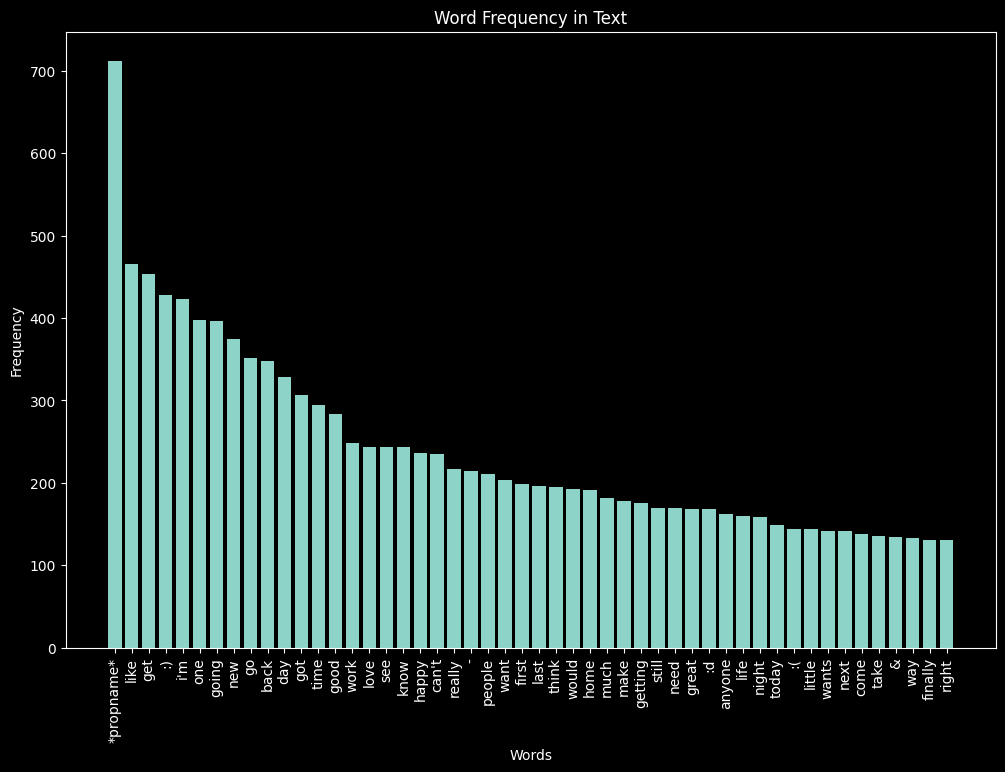

In [10]:


# Define data
data = [('*propname*', 712),
 ('like', 465),
 ('get', 454),
 (':)', 428),
 ("i'm", 423),
 ('one', 397),
 ('going', 396),
 ('new', 375),
 ('go', 352),
 ('back', 348),
 ('day', 329),
 ('got', 307),
 ('time', 295),
 ('good', 284),
 ('work', 248),
 ('love', 244),
 ('see', 243),
 ('know', 243),
 ('happy', 236),
 ("can't", 235),
 ('really', 217),
 ('-', 214),
 ('people', 211),
 ('want', 204),
 ('first', 199),
 ('last', 196),
 ('think', 195),
 ('would', 192),
 ('home', 191),
 ('much', 181),
 ('make', 178),
 ('getting', 175),
 ('still', 170),
 ('need', 170),
 ('great', 168),
 (':d', 168),
 ('anyone', 162),
 ('life', 160),
 ('night', 159),
 ('today', 149),
 (':(', 144),
 ('little', 144),
 ('wants', 142),
 ('next', 142),
 ('come', 138),
 ('take', 136),
 ('&', 134),
 ('way', 133),
 ('finally', 131),
 ('right', 130)]


x_data = [d[0] for d in data]
y_data = [d[1] for d in data]

plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(12, 8))


ax.bar(x_data, y_data)


ax.set_xlabel('Words')
ax.set_ylabel('Frequency')
ax.set_title('Word Frequency in Text')


plt.xticks(rotation=90)


plt.show()


<h3>4.4. Removing frequent words :

In [11]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(50)])
def remove_freqwords(text):
    """custom function to remo/ve the frequent words"""

    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

df["text_wo_stopfreq"] = df["text_wo_stop"].apply(lambda text: remove_freqwords(text))
df.head()

,STATUS,text_lower,text_wo_stop,text_wo_stopfreq
0,likes the sound of thunder.,likes the sound of thunder.,likes sound thunder.,likes sound thunder.
1,is so sleepy it's not even funny that's she ca...,is so sleepy it's not even funny that's she ca...,sleepy even funny that's can't get sleep.,sleepy even funny that's sleep.
2,is sore and wants the knot of muscles at the b...,is sore and wants the knot of muscles at the b...,sore wants knot muscles base neck stop hurting...,sore knot muscles base neck stop hurting. hand...
3,likes how the day sounds in this new song.,likes how the day sounds in this new song.,likes day sounds new song.,likes sounds song.
4,is home. <3,is home. <3,home. <3,home. <3


<H3>4.5. Removing the rare words

In [12]:
df.drop(["text_wo_stop"], axis=1, inplace=True)
n_rare_words = 10

rare_words = []

RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    x = " ".join([word for word in str(text).split() if word not in RAREWORDS])
    rare_words.append(x)
    """custom function to remove the rare words"""
    return x

df["text_wo_stopfreqrare"] = df["text_wo_stopfreq"].apply(lambda text: remove_rarewords(text))
df.head()

,STATUS,text_lower,text_wo_stopfreq,text_wo_stopfreqrare
0,likes the sound of thunder.,likes the sound of thunder.,likes sound thunder.,likes sound thunder.
1,is so sleepy it's not even funny that's she ca...,is so sleepy it's not even funny that's she ca...,sleepy even funny that's sleep.,sleepy even funny that's sleep.
2,is sore and wants the knot of muscles at the b...,is sore and wants the knot of muscles at the b...,sore knot muscles base neck stop hurting. hand...,sore knot muscles base neck stop hurting. hand...
3,likes how the day sounds in this new song.,likes how the day sounds in this new song.,likes sounds song.,likes sounds song.
4,is home. <3,is home. <3,home. <3,home. <3


In [13]:
rare_words

['likes sound thunder.',
 "sleepy even funny that's sleep.",
 'sore knot muscles base neck stop hurting. hand, yay illinois! <3',
 'likes sounds song.',
 'home. <3',
 'www.thejokerblogs.com',
 'saw nun zombie, liked it. also, + tentacle!man + psychic powers = party.',
 'kentucky. 421 miles 1100 mile journey home.',
 'finish digital painting tablet went haywire. contemplating many ways wishes exact revenge faulty technology.',
 'celebrating haircut listening swinger music generally looking doofus.',
 'crush green lantern.',
 'magic brain.',
 'saw transformers, up, year week. movie overload.',
 'meet schedule pick-up oviedo?',
 'desires thrill inspiration. also, money.',
 'bed 9:30! yeah!',
 "reading, admiring permit, occasionally glancing ner mcdonald's uniform.",
 'thinks intangibility option reality settings.',
 'tired. *propname*, let sleep pl0x.',
 'discovering many flavors insomnia.',
 'watching cousin play computer game televison box thing. also, sleepy.',
 'urge draw stuff school

<h1>5) Natural Language Processing

---



<h3>5.1. Stemming</h3>

In [14]:
#importing PorterStemmer
from nltk.stem.porter import PorterStemmer

In [15]:
stemmer = PorterStemmer()
words = []
def stem_words(text):
    x =  " ".join([stemmer.stem(word) for word in text.split()])
    words.append(x)

    return x
#df.drop("text_wo_punct", axis=1, inplace=True)
df["text_stemmed"] = df["text_wo_stopfreqrare"].apply(lambda text: stem_words(text))
df.head()

,STATUS,text_lower,text_wo_stopfreq,text_wo_stopfreqrare,text_stemmed
0,likes the sound of thunder.,likes the sound of thunder.,likes sound thunder.,likes sound thunder.,like sound thunder.
1,is so sleepy it's not even funny that's she ca...,is so sleepy it's not even funny that's she ca...,sleepy even funny that's sleep.,sleepy even funny that's sleep.,sleepi even funni that' sleep.
2,is sore and wants the knot of muscles at the b...,is sore and wants the knot of muscles at the b...,sore knot muscles base neck stop hurting. hand...,sore knot muscles base neck stop hurting. hand...,"sore knot muscl base neck stop hurting. hand, ..."
3,likes how the day sounds in this new song.,likes how the day sounds in this new song.,likes sounds song.,likes sounds song.,like sound song.
4,is home. <3,is home. <3,home. <3,home. <3,home. <3


In [16]:
words

['like sound thunder.',
 "sleepi even funni that' sleep.",
 'sore knot muscl base neck stop hurting. hand, yay illinois! <3',
 'like sound song.',
 'home. <3',
 'www.thejokerblogs.com',
 'saw nun zombie, like it. also, + tentacle!man + psychic power = party.',
 'kentucky. 421 mile 1100 mile journey home.',
 'finish digit paint tablet went haywire. contempl mani way wish exact reveng faulti technology.',
 'celebr haircut listen swinger music gener look doofus.',
 'crush green lantern.',
 'magic brain.',
 'saw transformers, up, year week. movi overload.',
 'meet schedul pick-up oviedo?',
 'desir thrill inspiration. also, money.',
 'bed 9:30! yeah!',
 "reading, admir permit, occasion glanc ner mcdonald' uniform.",
 'think intang option realiti settings.',
 'tired. *propname*, let sleep pl0x.',
 'discov mani flavor insomnia.',
 'watch cousin play comput game televison box thing. also, sleepy.',
 'urg draw stuff school? d;',
 "who'da thought singl text messag could enough chang mind?",
 'wi

Dowloading wordnet and omw-1.4

In [17]:
nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True


<h3>5.2. Lemmatizer<h3>





In [18]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df["text_lemmatized"] = df["text_wo_stopfreqrare"].apply(lambda text: lemmatize_words(text))
df.head()


,STATUS,text_lower,text_wo_stopfreq,text_wo_stopfreqrare,text_stemmed,text_lemmatized
0,likes the sound of thunder.,likes the sound of thunder.,likes sound thunder.,likes sound thunder.,like sound thunder.,like sound thunder.
1,is so sleepy it's not even funny that's she ca...,is so sleepy it's not even funny that's she ca...,sleepy even funny that's sleep.,sleepy even funny that's sleep.,sleepi even funni that' sleep.,sleepy even funny that's sleep.
2,is sore and wants the knot of muscles at the b...,is sore and wants the knot of muscles at the b...,sore knot muscles base neck stop hurting. hand...,sore knot muscles base neck stop hurting. hand...,"sore knot muscl base neck stop hurting. hand, ...","sore knot muscle base neck stop hurting. hand,..."
3,likes how the day sounds in this new song.,likes how the day sounds in this new song.,likes sounds song.,likes sounds song.,like sound song.,like sound song.
4,is home. <3,is home. <3,home. <3,home. <3,home. <3,home. <3


<h3>6. EMOTICONS TO TEXT MAKING :

In [19]:
EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u"<3":"love",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

In [20]:
def convert_emoticons(text):
    for emot in EMOTICONS:
      text = re.sub(u'('+emot+')', "_".join(EMOTICONS[emot].replace(",","").split()), text)
    return text

df["convert_emot"] = df["text_lemmatized"].apply(lambda text: convert_emoticons(text))

df.head()

,STATUS,text_lower,text_wo_stopfreq,text_wo_stopfreqrare,text_stemmed,text_lemmatized,convert_emot
0,likes the sound of thunder.,likes the sound of thunder.,likes sound thunder.,likes sound thunder.,like sound thunder.,like sound thunder.,like sound thunder.
1,is so sleepy it's not even funny that's she ca...,is so sleepy it's not even funny that's she ca...,sleepy even funny that's sleep.,sleepy even funny that's sleep.,sleepi even funni that' sleep.,sleepy even funny that's sleep.,sleepy even funny that's sleep.
2,is sore and wants the knot of muscles at the b...,is sore and wants the knot of muscles at the b...,sore knot muscles base neck stop hurting. hand...,sore knot muscles base neck stop hurting. hand...,"sore knot muscl base neck stop hurting. hand, ...","sore knot muscle base neck stop hurting. hand,...","sore knot muscle base neck stop hurting. hand,..."
3,likes how the day sounds in this new song.,likes how the day sounds in this new song.,likes sounds song.,likes sounds song.,like sound song.,like sound song.,like sound song.
4,is home. <3,is home. <3,home. <3,home. <3,home. <3,home. <3,home. love


<h3>7. Remove urls







In [21]:
urls = []
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    #urls.append()
    return url_pattern.sub(r'', text)
df["Remove_url_"] = df["convert_emot"].apply(lambda text: remove_urls(text))
df.head()

,STATUS,text_lower,text_wo_stopfreq,text_wo_stopfreqrare,text_stemmed,text_lemmatized,convert_emot,Remove_url_
0,likes the sound of thunder.,likes the sound of thunder.,likes sound thunder.,likes sound thunder.,like sound thunder.,like sound thunder.,like sound thunder.,like sound thunder.
1,is so sleepy it's not even funny that's she ca...,is so sleepy it's not even funny that's she ca...,sleepy even funny that's sleep.,sleepy even funny that's sleep.,sleepi even funni that' sleep.,sleepy even funny that's sleep.,sleepy even funny that's sleep.,sleepy even funny that's sleep.
2,is sore and wants the knot of muscles at the b...,is sore and wants the knot of muscles at the b...,sore knot muscles base neck stop hurting. hand...,sore knot muscles base neck stop hurting. hand...,"sore knot muscl base neck stop hurting. hand, ...","sore knot muscle base neck stop hurting. hand,...","sore knot muscle base neck stop hurting. hand,...","sore knot muscle base neck stop hurting. hand,..."
3,likes how the day sounds in this new song.,likes how the day sounds in this new song.,likes sounds song.,likes sounds song.,like sound song.,like sound song.,like sound song.,like sound song.
4,is home. <3,is home. <3,home. <3,home. <3,home. <3,home. <3,home. love,home. love


<h3>8. Punctuation removal :

In [22]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["text_wo_punct"] = df["Remove_url_"].apply(lambda text: remove_punctuation(text))
df.head()

,STATUS,text_lower,text_wo_stopfreq,text_wo_stopfreqrare,text_stemmed,text_lemmatized,convert_emot,Remove_url_,text_wo_punct
0,likes the sound of thunder.,likes the sound of thunder.,likes sound thunder.,likes sound thunder.,like sound thunder.,like sound thunder.,like sound thunder.,like sound thunder.,like sound thunder
1,is so sleepy it's not even funny that's she ca...,is so sleepy it's not even funny that's she ca...,sleepy even funny that's sleep.,sleepy even funny that's sleep.,sleepi even funni that' sleep.,sleepy even funny that's sleep.,sleepy even funny that's sleep.,sleepy even funny that's sleep.,sleepy even funny thats sleep
2,is sore and wants the knot of muscles at the b...,is sore and wants the knot of muscles at the b...,sore knot muscles base neck stop hurting. hand...,sore knot muscles base neck stop hurting. hand...,"sore knot muscl base neck stop hurting. hand, ...","sore knot muscle base neck stop hurting. hand,...","sore knot muscle base neck stop hurting. hand,...","sore knot muscle base neck stop hurting. hand,...",sore knot muscle base neck stop hurting hand y...
3,likes how the day sounds in this new song.,likes how the day sounds in this new song.,likes sounds song.,likes sounds song.,like sound song.,like sound song.,like sound song.,like sound song.,like sound song
4,is home. <3,is home. <3,home. <3,home. <3,home. <3,home. <3,home. love,home. love,home love


<h3> 9. Generating Random Names



In [23]:
df_names = pd.read_csv("name.csv",names=["Names"],header=None)
df_names.head()

,Names
NaN,Unnamed: 0
0.0,Tammy Walker
1.0,Gregory Frey
2.0,Jennifer Murphy
3.0,Jose Peters


9.1 Concatinating the names to respective anonymous ID in orginal dataset.

In [24]:
a=pd.concat([pd.DataFrame(full_df["#AUTHID"].unique()),df_names],axis=1)
a.head()

,0,Names
0.0,b7b7764cfa1c523e4e93ab2a79a946c4,Tammy Walker
1.0,318bf822d4f2bd3920367560218619c0,Gregory Frey
2.0,ecbddbfe00e0f83cfdb802a7186061c7,Jennifer Murphy
3.0,db39f7b2aad360b1033ec1f8fcd57f9c,Jose Peters
4.0,4d035bd3fd8d9595d15cea9e388964be,Jason Hall


In [25]:
a.columns = ["ID","NAME"]
a.head()

,ID,NAME
0.0,b7b7764cfa1c523e4e93ab2a79a946c4,Tammy Walker
1.0,318bf822d4f2bd3920367560218619c0,Gregory Frey
2.0,ecbddbfe00e0f83cfdb802a7186061c7,Jennifer Murphy
3.0,db39f7b2aad360b1033ec1f8fcd57f9c,Jose Peters
4.0,4d035bd3fd8d9595d15cea9e388964be,Jason Hall


In [26]:
a[a['ID'] == "ecbddbfe00e0f83cfdb802a7186061c7"]["NAME"]

2.0    Jennifer Murphy
Name: NAME, dtype: object

In [27]:
anon_ID = full_df["#AUTHID"].unique()
names = df_names['Names'].unique()

In [28]:
mapper = dict()
for j,id in enumerate(anon_ID):
  for i,name in enumerate(names) :
    if i==j:
      mapper[id] = name

mapper

{'b7b7764cfa1c523e4e93ab2a79a946c4': 'Unnamed: 0',
 '318bf822d4f2bd3920367560218619c0': 'Tammy Walker',
 'ecbddbfe00e0f83cfdb802a7186061c7': 'Gregory Frey',
 'db39f7b2aad360b1033ec1f8fcd57f9c': 'Jennifer Murphy',
 '4d035bd3fd8d9595d15cea9e388964be': 'Jose Peters',
 '172400f46880b309ca5e97d322bb8f01': 'Jason Hall',
 '200255966ca6e2636535b5b93ac04497': 'Maria Kelly',
 '5489ed38556af050d6a93e5d27b95dfb': 'Brent Bautista',
 'b9a44bb356832160caccc9eb3614e0ce': 'Colleen Ferguson',
 '9a8cf1dcb2de1a8f70c4745a636bbb96': 'Brianna Hendricks',
 '527ed53d2ba3a3bc417b8402d5b2f556': 'Benjamin Ellis',
 '751e53fc64b770f7b5ea2b0964678599': 'Tara Walker',
 'c19a4fb5e846fb6575b0a8f3a2081ea0': 'Miranda Alexander',
 'e6cdef6f475cce3023c5b715f8c9f110': 'Patrick Pennington',
 '2badb47503a98766c89e266d1130969a': 'Scott Branch',
 '1c10cc0852579d2fa000e3fc3327bb98': 'Lynn Williams',
 '0737e4e4980f56c9fb1cb5743001c917': 'Michael Garcia',
 'a6336ec5e11839ae33aee01fa2163652': 'Stephen Mercer',
 '3d7847b1c33b5f58112

In [29]:
names = full_df["#AUTHID"].map(mapper)
full_df['NAMES'] = names
full_df.head(10)

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,...,cOPN,DATE,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY,NAMES
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,n,y,n,...,y,06/19/09 03:21 PM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1,Unnamed: 0
1,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she ca...,2.65,3.0,3.15,3.25,4.4,n,y,n,...,y,07/02/09 08:41 AM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1,Unnamed: 0
2,b7b7764cfa1c523e4e93ab2a79a946c4,is sore and wants the knot of muscles at the b...,2.65,3.0,3.15,3.25,4.4,n,y,n,...,y,06/15/09 01:15 PM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1,Unnamed: 0
3,b7b7764cfa1c523e4e93ab2a79a946c4,likes how the day sounds in this new song.,2.65,3.0,3.15,3.25,4.4,n,y,n,...,y,06/22/09 04:48 AM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1,Unnamed: 0
4,b7b7764cfa1c523e4e93ab2a79a946c4,is home. <3,2.65,3.0,3.15,3.25,4.4,n,y,n,...,y,07/20/09 02:31 AM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1,Unnamed: 0
5,b7b7764cfa1c523e4e93ab2a79a946c4,www.thejokerblogs.com,2.65,3.0,3.15,3.25,4.4,n,y,n,...,y,07/16/09 03:21 PM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1,Unnamed: 0
6,b7b7764cfa1c523e4e93ab2a79a946c4,"saw a nun zombie, and liked it. Also, *PROPNAM...",2.65,3.0,3.15,3.25,4.4,n,y,n,...,y,06/27/09 05:41 AM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1,Unnamed: 0
7,b7b7764cfa1c523e4e93ab2a79a946c4,is in Kentucky. 421 miles into her 1100 mile j...,2.65,3.0,3.15,3.25,4.4,n,y,n,...,y,07/18/09 06:34 AM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1,Unnamed: 0
8,b7b7764cfa1c523e4e93ab2a79a946c4,was about to finish a digital painting before ...,2.65,3.0,3.15,3.25,4.4,n,y,n,...,y,07/09/09 02:58 PM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1,Unnamed: 0
9,b7b7764cfa1c523e4e93ab2a79a946c4,is celebrating her new haircut by listening to...,2.65,3.0,3.15,3.25,4.4,n,y,n,...,y,07/07/09 11:41 PM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1,Unnamed: 0


In [30]:
#concatinating two DataFrame..
post_df = pd.merge(full_df,df, on="STATUS")
post_df

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,...,TRANSITIVITY,NAMES,text_lower,text_wo_stopfreq,text_wo_stopfreqrare,text_stemmed,text_lemmatized,convert_emot,Remove_url_,text_wo_punct
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.00,3.15,3.25,4.40,n,y,n,...,0.10,Unnamed: 0,likes the sound of thunder.,likes sound thunder.,likes sound thunder.,like sound thunder.,like sound thunder.,like sound thunder.,like sound thunder.,like sound thunder
1,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she ca...,2.65,3.00,3.15,3.25,4.40,n,y,n,...,0.10,Unnamed: 0,is so sleepy it's not even funny that's she ca...,sleepy even funny that's sleep.,sleepy even funny that's sleep.,sleepi even funni that' sleep.,sleepy even funny that's sleep.,sleepy even funny that's sleep.,sleepy even funny that's sleep.,sleepy even funny thats sleep
2,b7b7764cfa1c523e4e93ab2a79a946c4,is sore and wants the knot of muscles at the b...,2.65,3.00,3.15,3.25,4.40,n,y,n,...,0.10,Unnamed: 0,is sore and wants the knot of muscles at the b...,sore knot muscles base neck stop hurting. hand...,sore knot muscles base neck stop hurting. hand...,"sore knot muscl base neck stop hurting. hand, ...","sore knot muscle base neck stop hurting. hand,...","sore knot muscle base neck stop hurting. hand,...","sore knot muscle base neck stop hurting. hand,...",sore knot muscle base neck stop hurting hand y...
3,b7b7764cfa1c523e4e93ab2a79a946c4,likes how the day sounds in this new song.,2.65,3.00,3.15,3.25,4.40,n,y,n,...,0.10,Unnamed: 0,likes how the day sounds in this new song.,likes sounds song.,likes sounds song.,like sound song.,like sound song.,like sound song.,like sound song.,like sound song
4,b7b7764cfa1c523e4e93ab2a79a946c4,is home. <3,2.65,3.00,3.15,3.25,4.40,n,y,n,...,0.10,Unnamed: 0,is home. <3,home. <3,home. <3,home. <3,home. <3,home. love,home. love,home love
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10008,deb899e426c1a5c66c24eeb0d7df6257,little things give you away.,2.15,2.15,4.10,2.90,4.60,n,n,y,...,0.63,Lindsay Taylor,little things give you away.,things give away.,things give away.,thing give away.,thing give away.,thing give away.,thing give away.,thing give away
10009,ea28a927cb6663480ea33ca917c3c8ba,is wishing it was Saturday.,4.05,3.35,3.80,3.95,4.50,y,y,y,...,0.26,William Vaughn,is wishing it was saturday.,wishing saturday.,wishing saturday.,wish saturday.,wishing saturday.,wishing saturday.,wishing saturday.,wishing saturday
10010,ea28a927cb6663480ea33ca917c3c8ba,is studying hard for the G.R.E.,4.05,3.35,3.80,3.95,4.50,y,y,y,...,0.26,William Vaughn,is studying hard for the g.r.e.,studying hard g.r.e.,studying hard,studi hard,studying hard,studying hard,studying hard,studying hard
10011,5532642937eb3497a43e15dbb23a9d2d,snipers get more head,1.40,4.05,3.30,3.40,3.95,n,y,n,...,0.05,Rebecca Steele,snipers get more head,snipers head,head,head,head,head,head,head


In [31]:
post_df["NAMES"].unique
post_df.NAMES = post_df.NAMES.fillna('Krishnamoorthy')

<h3>10. Translation



In [32]:
!pip install googletrans==3.1.0a0

In [33]:
from googletrans import Translator
sentence = []
translator = Translator()
for i in post_df["text_wo_punct"]:
  translation = translator.translate(i, dest='en')
  sentence.append(translation.text)
#print(sentence)
post_df["final_status"] = sentence
post_df.head()

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,...,NAMES,text_lower,text_wo_stopfreq,text_wo_stopfreqrare,text_stemmed,text_lemmatized,convert_emot,Remove_url_,text_wo_punct,final_status
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,n,y,n,...,Unnamed: 0,likes the sound of thunder.,likes sound thunder.,likes sound thunder.,like sound thunder.,like sound thunder.,like sound thunder.,like sound thunder.,like sound thunder,like sound thunder
1,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she ca...,2.65,3.0,3.15,3.25,4.4,n,y,n,...,Unnamed: 0,is so sleepy it's not even funny that's she ca...,sleepy even funny that's sleep.,sleepy even funny that's sleep.,sleepi even funni that' sleep.,sleepy even funny that's sleep.,sleepy even funny that's sleep.,sleepy even funny that's sleep.,sleepy even funny thats sleep,sleepy even funny thats sleep
2,b7b7764cfa1c523e4e93ab2a79a946c4,is sore and wants the knot of muscles at the b...,2.65,3.0,3.15,3.25,4.4,n,y,n,...,Unnamed: 0,is sore and wants the knot of muscles at the b...,sore knot muscles base neck stop hurting. hand...,sore knot muscles base neck stop hurting. hand...,"sore knot muscl base neck stop hurting. hand, ...","sore knot muscle base neck stop hurting. hand,...","sore knot muscle base neck stop hurting. hand,...","sore knot muscle base neck stop hurting. hand,...",sore knot muscle base neck stop hurting hand y...,sore knot muscle base neck stop hurting hand y...
3,b7b7764cfa1c523e4e93ab2a79a946c4,likes how the day sounds in this new song.,2.65,3.0,3.15,3.25,4.4,n,y,n,...,Unnamed: 0,likes how the day sounds in this new song.,likes sounds song.,likes sounds song.,like sound song.,like sound song.,like sound song.,like sound song.,like sound song,like sound song
4,b7b7764cfa1c523e4e93ab2a79a946c4,is home. <3,2.65,3.0,3.15,3.25,4.4,n,y,n,...,Unnamed: 0,is home. <3,home. <3,home. <3,home. <3,home. <3,home. love,home. love,home love,home love


<h3>11. Sentiment analysis

11.1. Positive and negative separation

*   Negative - depressed
*   positive - not depressed







In [34]:
#import nltk
#import pandas as pd
#import numpy as np
from nltk.sentiment import SentimentAnalyzer
nltk.download('vader_lexicon')

#df = pd.read_csv("mypersonality_final.csv",encoding = "ISO-8859-1")
#df.head()
# Load NLTK's pre-trained sentiment analyzer
sid = nltk.sentiment.SentimentIntensityAnalyzer()
text_messages = post_df.final_status.values.tolist()
score = []
final = []
depressed=[]
c_p = 0
c_n = 0

for text in text_messages:
    scores = sid.polarity_scores(text)
    if scores['compound'] >= 0 :
        c_p = c_p + 1
        final.append("Positive")
        depressed.append("NO")
    elif scores['compound'] <0 :
        c_n = c_n + 1
        final.append("Negative")
        depressed.append("YES")
    score.append(scores['compound'])


#print(final)
post_df['Sentiment_score'] = score
post_df['Sentiment_analized'] = final
post_df['Depressed'] = depressed
post_df.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,...,text_wo_stopfreqrare,text_stemmed,text_lemmatized,convert_emot,Remove_url_,text_wo_punct,final_status,Sentiment_score,Sentiment_analized,Depressed
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,n,y,n,...,likes sound thunder.,like sound thunder.,like sound thunder.,like sound thunder.,like sound thunder.,like sound thunder,like sound thunder,0.3612,Positive,NO
1,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she ca...,2.65,3.0,3.15,3.25,4.4,n,y,n,...,sleepy even funny that's sleep.,sleepi even funni that' sleep.,sleepy even funny that's sleep.,sleepy even funny that's sleep.,sleepy even funny that's sleep.,sleepy even funny thats sleep,sleepy even funny thats sleep,0.4404,Positive,NO
2,b7b7764cfa1c523e4e93ab2a79a946c4,is sore and wants the knot of muscles at the b...,2.65,3.0,3.15,3.25,4.4,n,y,n,...,sore knot muscles base neck stop hurting. hand...,"sore knot muscl base neck stop hurting. hand, ...","sore knot muscle base neck stop hurting. hand,...","sore knot muscle base neck stop hurting. hand,...","sore knot muscle base neck stop hurting. hand,...",sore knot muscle base neck stop hurting hand y...,sore knot muscle base neck stop hurting hand y...,0.6597,Positive,NO
3,b7b7764cfa1c523e4e93ab2a79a946c4,likes how the day sounds in this new song.,2.65,3.0,3.15,3.25,4.4,n,y,n,...,likes sounds song.,like sound song.,like sound song.,like sound song.,like sound song.,like sound song,like sound song,0.3612,Positive,NO
4,b7b7764cfa1c523e4e93ab2a79a946c4,is home. <3,2.65,3.0,3.15,3.25,4.4,n,y,n,...,home. <3,home. <3,home. <3,home. love,home. love,home love,home love,0.6369,Positive,NO


<h3> 11.1.1. Graphical representation

In [35]:
depressedcount = 0
for i in post_df["Depressed"]:
  if i =="YES":
    depressedcount = depressedcount+1
nondepressedcount = 0
for i in post_df["Depressed"]:
  if i =="NO":
    nondepressedcount = nondepressedcount+1
print(depressedcount)
print(nondepressedcount)


2247
7766


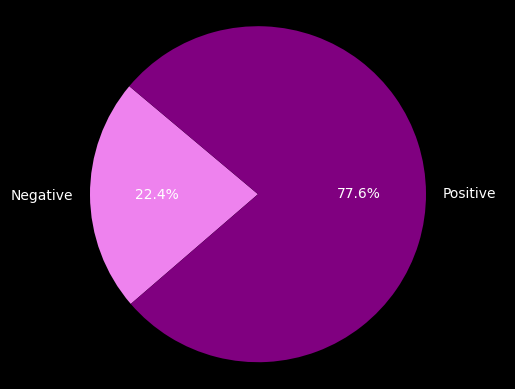

In [36]:
x=depressedcount
y=nondepressedcount
#x = 2229
#y = 7784
total = x + y
x_percentage = x / total * 100
y_percentage = y / total * 100


labels = 'Negative', 'Positive'
sizes = [x_percentage, y_percentage]
colors = ['violet', 'purple']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.show()

<h3>11.1. Calculating scores for each status

In [37]:
#import nltk
#import pandas as pd
#import numpy as np
from nltk.sentiment import SentimentAnalyzer
nltk.download('vader_lexicon')

#df = pd.read_csv("mypersonality_final.csv",encoding = "ISO-8859-1")
#df.head()
# Load NLTK's pre-trained sentiment analyzer
sid = nltk.sentiment.SentimentIntensityAnalyzer()
text_messages = post_df.final_status.values.tolist()
score = []
final = []
compound = []
positive = []
negative =[]
neutral = []
depressed=[]
for text in text_messages:
    scores = sid.polarity_scores(text)
    if scores['compound'] >= 0 :
        final.append("Positive")
        depressed.append("NO")
    elif scores['compound'] <0 :
        final.append("Negative")
        depressed.append("YES")
    score.append(scores['compound'])

    compound.append(scores['compound'])
    positive.append(scores['pos'])
    negative.append(scores['neg'])
    neutral.append(scores['neu'])

#print(final)
post_df['SentiNEG'] = negative
post_df['SentiPOS'] = positive
post_df['SentiNEU'] = neutral
post_df['SentiCOMPOUND'] = compound
post_df['Sentiment_score'] = score
post_df['Sentiment_analized'] = final
post_df['Depressed'] = depressed
post_df

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,...,Remove_url_,text_wo_punct,final_status,Sentiment_score,Sentiment_analized,Depressed,SentiNEG,SentiPOS,SentiNEU,SentiCOMPOUND
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.00,3.15,3.25,4.40,n,y,n,...,like sound thunder.,like sound thunder,like sound thunder,0.3612,Positive,NO,0.000,0.556,0.444,0.3612
1,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she ca...,2.65,3.00,3.15,3.25,4.40,n,y,n,...,sleepy even funny that's sleep.,sleepy even funny thats sleep,sleepy even funny thats sleep,0.4404,Positive,NO,0.000,0.420,0.580,0.4404
2,b7b7764cfa1c523e4e93ab2a79a946c4,is sore and wants the knot of muscles at the b...,2.65,3.00,3.15,3.25,4.40,n,y,n,...,"sore knot muscle base neck stop hurting. hand,...",sore knot muscle base neck stop hurting hand y...,sore knot muscle base neck stop hurting hand y...,0.6597,Positive,NO,0.319,0.466,0.216,0.6597
3,b7b7764cfa1c523e4e93ab2a79a946c4,likes how the day sounds in this new song.,2.65,3.00,3.15,3.25,4.40,n,y,n,...,like sound song.,like sound song,like sound song,0.3612,Positive,NO,0.000,0.556,0.444,0.3612
4,b7b7764cfa1c523e4e93ab2a79a946c4,is home. <3,2.65,3.00,3.15,3.25,4.40,n,y,n,...,home. love,home love,home love,0.6369,Positive,NO,0.000,0.808,0.192,0.6369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10008,deb899e426c1a5c66c24eeb0d7df6257,little things give you away.,2.15,2.15,4.10,2.90,4.60,n,n,y,...,thing give away.,thing give away,thing give away,0.0000,Positive,NO,0.000,0.000,1.000,0.0000
10009,ea28a927cb6663480ea33ca917c3c8ba,is wishing it was Saturday.,4.05,3.35,3.80,3.95,4.50,y,y,y,...,wishing saturday.,wishing saturday,wishing saturday,0.2263,Positive,NO,0.000,0.655,0.345,0.2263
10010,ea28a927cb6663480ea33ca917c3c8ba,is studying hard for the G.R.E.,4.05,3.35,3.80,3.95,4.50,y,y,y,...,studying hard,studying hard,studying hard,-0.1027,Negative,YES,0.583,0.000,0.417,-0.1027
10011,5532642937eb3497a43e15dbb23a9d2d,snipers get more head,1.40,4.05,3.30,3.40,3.95,n,y,n,...,head,head,head,0.0000,Positive,NO,0.000,0.000,1.000,0.0000
